# THL SCAN WITH TimePix
## Heavily influenced from matlab scripts for medipix2 analysis as can be viewed at this link https://twiki.ppe.gla.ac.uk/bin/view/DetDev/MedipixMATLABScripts

version 1: From the ascii file output in pixelman, we get a non-extension file and a .dsc file for each acquisition. Make sure to save (atleast) 1 dsc file for records of your dac settings and other device controls-> otherwise put all the non-extension files together and give them a txt or csv extension. Those are the matrix files which for the timepix or medipix2 is 256 x 256 and refers to the pixels of the detector. 

ACQ in Medipix mode 

This code does the following: 
Section 1: 
    Load folders, organize count data, plot spectrum
    
Section 2:
    Fit the curve (photopeak(s)) as gaussian
    Find position of gaussian peak(s) : mu_alpha and mu_beta
    Find width of gaussian FWHM (Sigma_alpha, Sigma_beta)
    
Section 3: 
    Plot error due to charge sharing 
    Find standard dev,standard error, average count, average differential count. 



In [9]:
#RUN FIRST
import numpy as np 
from numpy import loadtxt
import matplotlib.pyplot as plt
from scipy.stats import norm 
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
#from astroML.density_estimation import GaussianMixture1D
#import sys
#   !{sys.executable} -m pip install astroML




Files used in spectrum: 
AMdactest2.1_THLFine_440_iToT.txt
AMdactest2.1_THLFine_441_iToT.txt
AMdactest2.1_THLFine_442_iToT.txt
AMdactest2.1_THLFine_443_iToT.txt
AMdactest2.1_THLFine_444_iToT.txt
AMdactest2.1_THLFine_445_iToT.txt
AMdactest2.1_THLFine_446_iToT.txt
AMdactest2.1_THLFine_447_iToT.txt
AMdactest2.1_THLFine_448_iToT.txt
AMdactest2.1_THLFine_449_iToT.txt
AMdactest2.1_THLFine_450_iToT.txt
AMdactest2.1_THLFine_451_iToT.txt
AMdactest2.1_THLFine_452_iToT.txt
AMdactest2.1_THLFine_453_iToT.txt
AMdactest2.1_THLFine_454_iToT.txt
AMdactest2.1_THLFine_455_iToT.txt
AMdactest2.1_THLFine_456_iToT.txt
AMdactest2.1_THLFine_457_iToT.txt
AMdactest2.1_THLFine_458_iToT.txt
AMdactest2.1_THLFine_459_iToT.txt
AMdactest2.1_THLFine_460_iToT.txt
AMdactest2.1_THLFine_461_iToT.txt
AMdactest2.1_THLFine_462_iToT.txt
AMdactest2.1_THLFine_463_iToT.txt
AMdactest2.1_THLFine_464_iToT.txt
AMdactest2.1_THLFine_465_iToT.txt
AMdactest2.1_THLFine_466_iToT.txt
AMdactest2.1_THLFine_467_iToT.txt
AMdactest2.1_THLFine_46

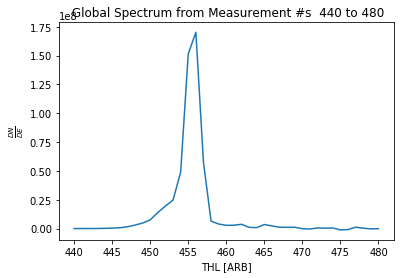

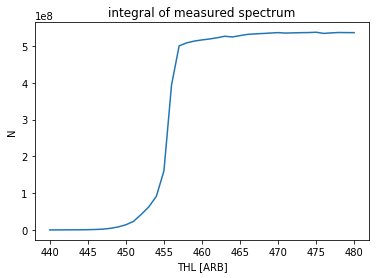

In [14]:
##SECTION ONE 

#NECCESSARY:

FilenamePrefix = 'AMdactest2.1_THLFine_' #String ;if scan1_thl433.txt filename prefix is scan1_thl
THLstart = 440 #begining of interested thl range
THLstop = 480 #end of the interested thl range
THLlength = THLstop - THLstart + 1

# #IF NEEDED
# Nstop = #how many acquisitions taken 
# kmax = THLStop - THLstart + 1 

THLVECT= []
datList=[]

print("Files used in spectrum: ")

for n in range(THLlength): ##range(start, stop, step)
    THLVAL = THLstart + n
    THLVECT.append(THLVAL)
    filename = "{}{}_iToT.txt" .format(FilenamePrefix,THLVAL)
    print(filename)
    dat = np.loadtxt(filename, usecols=range(256))
    mat = dat.flatten()
    datcount = np.sum(mat)
    datList.append(datcount)

#now we have two lists: THLVECT which is each of the ascending THL values
#and datList which is each summed element from acquisition
# next we differentiate datList and subtract 1 element from THLVECT

diffDAT = np.gradient(datList)
print(datList)


##PLOT SPECTRUM 
#depending on polarity you may need to comment out or comment in the inversion

plt.plot(THLVECT,diffDAT)
plt.xlabel("THL [ARB]")
plt.ylabel(r'$\frac{DN}{DE}$')
plt.title(' Global Spectrum from Measurement #s  {} to {}'.format(THLstart, THLstop))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
#ax = plt.gca()
#ax.invert_xaxis()
plt.show()

plt.plot(THLVECT,datList)
plt.xlabel("THL [ARB]")
plt.ylabel('N')
plt.title('integral of measured spectrum')
# ax = plt.gca()
# ax.invert_xaxis()
plt.show()


#want to save plot as text file for data 


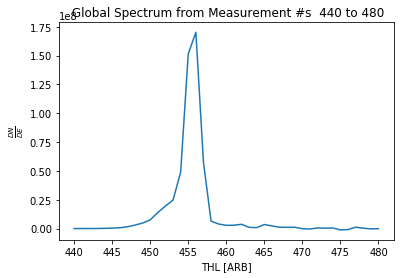

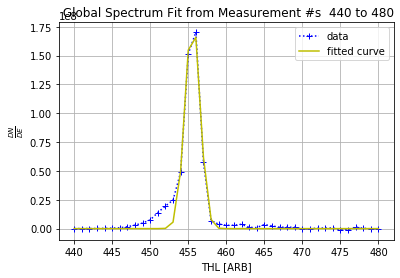

mean = 455.336 and sigma = 2.634
THL corresponding with peak = 440


In [36]:
#Section Two 

#first we will fit a gaussian on the plot and from there deterimine
#positions and FWHM for both peaks 


plt.plot(THLVECT,diffDAT)
plt.xlabel("THL [ARB]")
plt.ylabel(r'$\frac{DN}{DE}$')
plt.title(' Global Spectrum from Measurement #s  {} to {}'.format(THLstart, THLstop))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

#ax = plt.gca()
#ax.invert_xaxis()
plt.show()

#fit data to gaussian

x = THLVECT
y = diffDAT

# weighted arithmetic mean (corrected - check the section below)
mean = sum(x * y) / sum(y)
sigma = np.sqrt(sum(y * (x - mean)**2) / sum(y))

Text = 'mean = {0:.3f} and sigma = {1:.3f}'.format(mean,sigma)

def Gauss(x, a, x0, sigma):
    return a * np.exp(-(x - x0)**2 / (2 * sigma**2))

popt,pcov = curve_fit(Gauss, x, y, p0=[max(y), mean, sigma])

plt.plot(x, y, 'b+:', label='data')
plt.plot(x, Gauss(x, *popt), 'y-', label='fitted curve')
plt.legend()

plt.title(' Global Spectrum Fit from Measurement #s  {} to {}'.format(THLstart, THLstop))
plt.xlabel("THL [ARB]")
plt.ylabel(r'$\frac{DN}{DE}$')
plt.grid()
plt.show()
print(Text)
#Now we need to find and print the peak THL 

max_y = max(y) 
max_x = max_x = x[max_y.argmax()] 

print('THL corresponding with peak = {}'.format(max_x))

#now lets compare with known spectrum of the element, here AM 



Gaussian as applied on measurement: (as eqn 4.5 in NIKHEF paper - see cites)
$G(thl) = \frac{1}{\sigma \sqrt{2\pi}} * e ^{\frac{-(THL-\mu)^2}{2\sigma^2}}$

In [29]:
#Section Three

#plotting error due to charge sharing, standard deviation,
#standard error, average count, average differential count
